In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

Read merged file containing all the attributes

In [73]:
orig_merged_file = pd.read_csv('.\Market_food_prices_w_temp_converted.csv')

Encode commodity source to numeric value for plotting 

In [74]:
labels = orig_merged_file['commodity_source'].astype('category').cat.categories.tolist()
replace_map_comp = {'commodity_source' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
merged_file = orig_merged_file.copy()
merged_file.replace(replace_map_comp, inplace=True)
merged_file.to_csv('.\Market_food_prices_w_temp_replaced_final.csv', index=False)

In [75]:
print("Merged file")
print("="*60)
print(merged_file.info())
print("="*60)
print("Shape of the file")
print("="*60)
print(merged_file.shape)
print("="*60)
print("Unique values")
print("="*60)
print(merged_file.nunique())
print("="*60)
print("Describe the file")
print("="*60)
print(merged_file.describe(include='all'))
print("="*60)
print("Check if there are missing values")
print(merged_file.isnull().sum())
print("="*60)

Merged file
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307901 entries, 0 to 307900
Data columns (total 24 columns):
country_id               307901 non-null int64
country                  307901 non-null object
locality_id              307901 non-null int64
locality_name            302089 non-null object
mkt_id                   307901 non-null int64
mkt_name                 307901 non-null object
commodity_purchase_id    307901 non-null int64
currency_id              307901 non-null int64
currency_name            307901 non-null object
mkt_type_id              307901 non-null int64
mkt_type                 307901 non-null object
measurement_id           307901 non-null int64
measurement_unit         307901 non-null object
price_paid               307901 non-null float64
commodity_source         307901 non-null int64
measurement_const        307901 non-null float64
measurement_unit_type    307901 non-null object
commodity_purchased      307901 non-null object
avg_temp           

C:\Users\Janelle\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


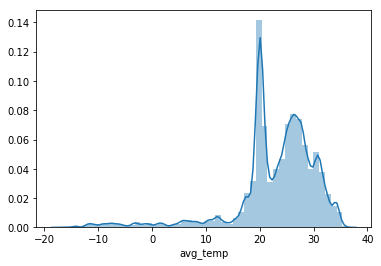

In [76]:
sns.distplot(merged_file['avg_temp'], hist=True)

C:\Users\Janelle\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


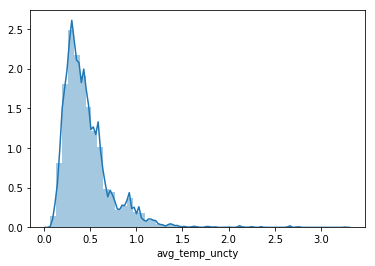

In [77]:
sns.distplot(merged_file['avg_temp_uncty'], hist=True)

C:\Users\Janelle\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


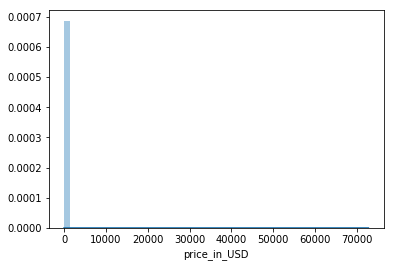

In [78]:
sns.distplot(merged_file['price_in_USD'], hist=True)

C:\Users\Janelle\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


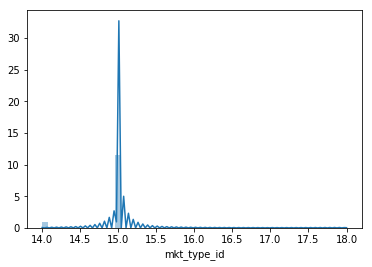

In [79]:
ax = sns.distplot(merged_file['mkt_type_id'] )

C:\Users\Janelle\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


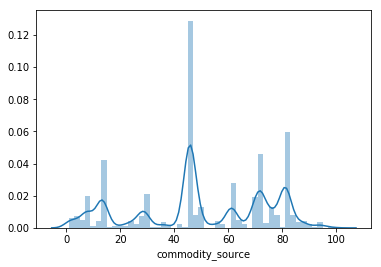

In [80]:
plt.figure()
ax = sns.distplot(merged_file_replace['commodity_source'] , hist=True)

Chi-squared test for independence

In [81]:
max_row = len(merged_file_replace)
chi2_chk = np.array([merged_file_replace['mkt_type_id'][0:max_row].values,
                  merged_file_replace['country_id'][0:max_row].values])
stats.chi2_contingency(chi2_chk)[0:3]

(18661514.848281886, 0.0, 307900)

In [82]:
chi2_chk = np.array([merged_file_replace['commodity_source'][0:max_row].values,
                  merged_file_replace['country_id'][0:max_row].values])
stats.chi2_contingency(chi2_chk)[0:3]

(56310776.3253108, 0.0, 307900)

In [83]:
chi2_chk = np.array([merged_file_replace['commodity_purchase_id'][0:max_row].values,
                  merged_file_replace['country_id'][0:max_row].values])
stats.chi2_contingency(chi2_chk)[0:3]

(48246612.90390645, 0.0, 307900)